Note that there is a systematic issue with the Swift/XRT spectra for this source, so a 20% uncertainty is added. 

In [1]:
import sys
import pandas as pd
import os
sys.path.append(os.path.abspath("../0_UTILITY_FUNCTIONS/"))
from get_data import *
from plotting import *
from get_LrLx_data import *

# Get Data

In [2]:
source_df, obs_df, radio_df, xray_df = read_data("../DATA/XTE J1701-462.txt")

XTE J1701-462
Added 5% systematic uncertainty to the radio data.
X-ray uncertainty percentage:  68
Added 20.0% systematic uncertainty to the X-ray data.


In [3]:
radio_df.head()

,name,blockID,band,t_radio,dt_radio,Rphase,Rstate,Fr,Fr_unc,local_rms,alpha,alpha_unc,Fr_uplim_bool
0,XTE J1701-462,1627313073,L,59421.75919,0.010366,NaN,SS,0.072,0.024000,NaN,NaN,NaN,True
1,XTE J1701-462,1662564675,L,59829.65461,0.010360,NaN,SS,0.074,0.024667,NaN,NaN,NaN,True
2,XTE J1701-462,1662741220,L,59831.70687,0.010370,NaN,SS,0.069,0.023000,NaN,NaN,NaN,True
3,XTE J1701-462,1663346775,L,59838.71566,0.010370,rise,SS,0.339,0.026216,NaN,0.26,0.46,False
4,XTE J1701-462,1663682476,L,59842.59219,0.010360,rise,SS,2.620,0.134391,NaN,-0.21,0.26,False


In [4]:
xray_df.head(4)

,name,obsID,t_xray,dt_xray,Xphase,Xstate,Fx,Fx_unc_l,Fx_unc_u,model,fit_stat,Fx_uplim_bool
0,XTE J1701-462,31776027,59828.83634,NaN,rise,SS,7.925000e-09,1.624641e-09,1.628412e-09,NaN,NaN,False
1,XTE J1701-462,31776028,59829.50204,NaN,rise,SS,6.368000e-09,1.274937e-09,1.274962e-09,NaN,NaN,False
2,XTE J1701-462,31776029,59830.44023,NaN,rise,SS,9.036000e-09,1.808270e-09,1.808285e-09,NaN,NaN,False
3,XTE J1701-462,31776030,59833.34430,NaN,rise,SS,1.122000e-08,2.249271e-09,2.249423e-09,NaN,NaN,False


# Light Curves

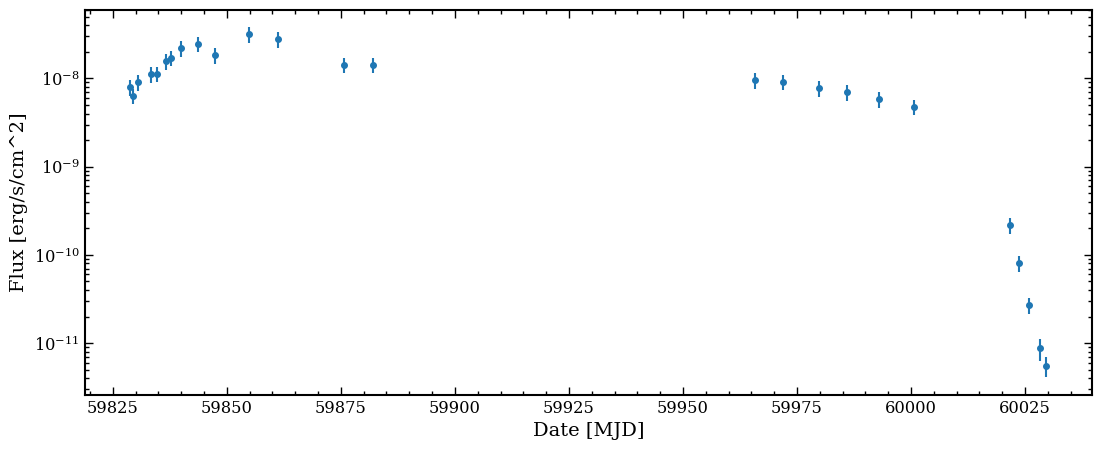

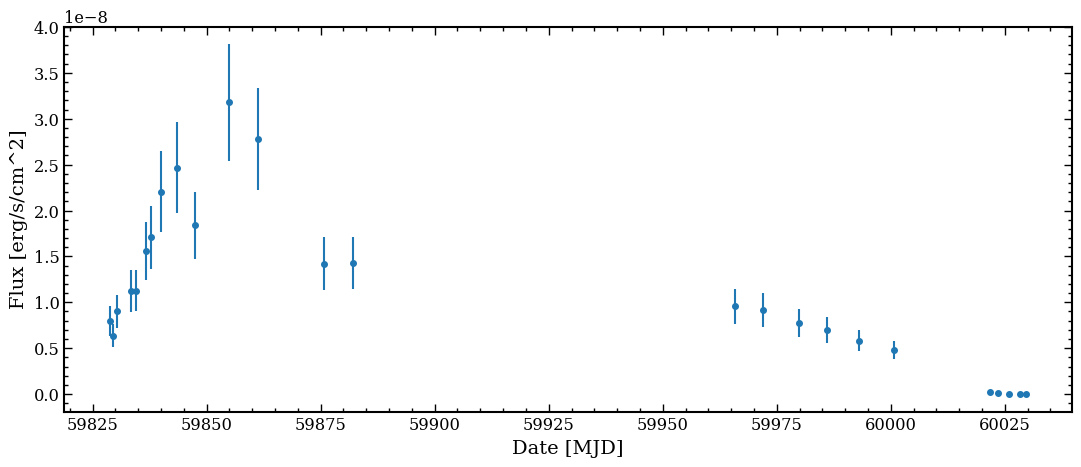

In [5]:
# WITH systematic errors
plot_xray_lightcurve(xray_df)

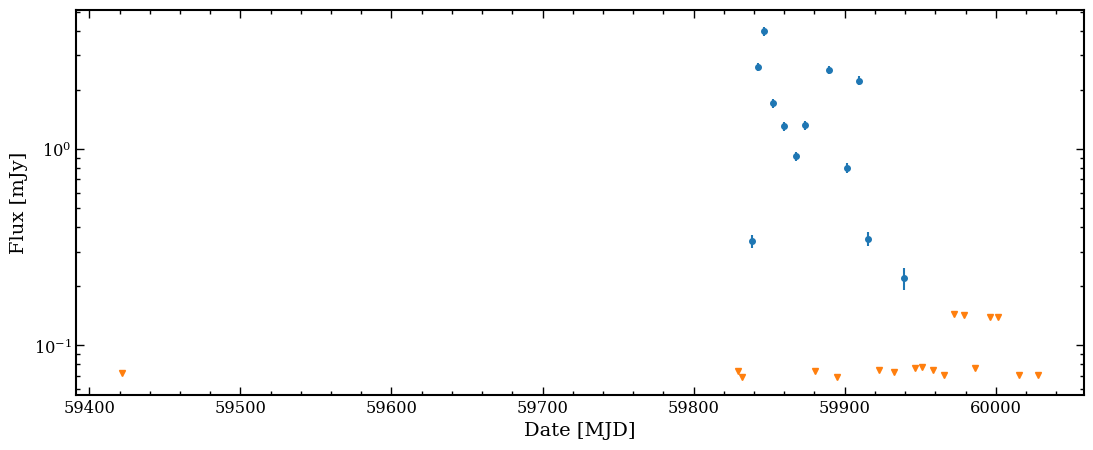

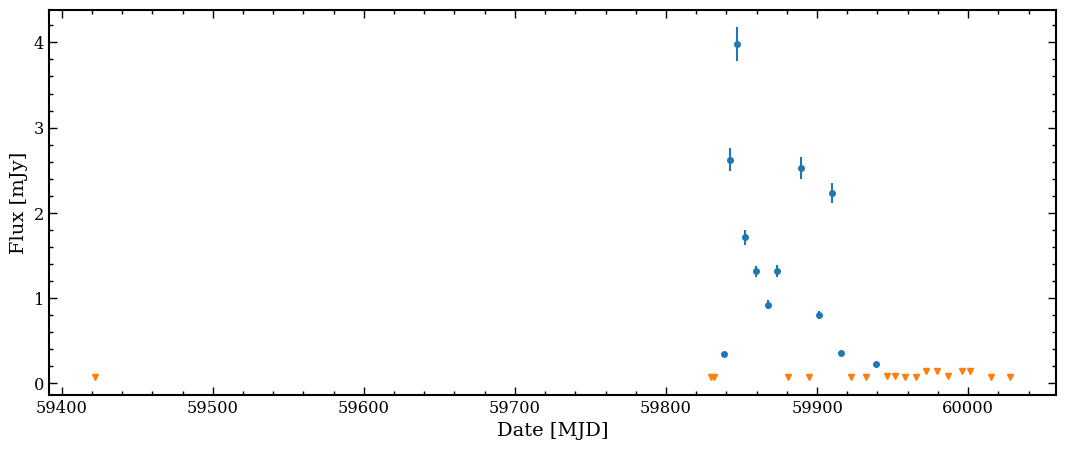

In [6]:
# WITH systematic error
plot_radio_lightcurve(radio_df)

# Pairing

In [7]:
paired_data = make_paired_Lr_Lx_df(radio_df, xray_df, source_df)

t_radio             Fr [mJy]            Fr_unc [mJy]        #xray     Mean Fx [erg/cm^2/s]          Fx_unc_l[erg/cm^2/s]          Fx_unc_u[erg/cm^2/s]          Fr_uplim_bool  Fx_uplim_bool  state          
59829.654610000     0.07400             0.02467             3         7.44918e-09                   8.77092e-10                   8.77694e-10                   True           False          SS             
59838.715660000     0.33900             0.02622             1         1.71000e-08                   3.42804e-09                   3.42826e-09                   False          False          SS             
59842.592190000     2.62000             0.13439             1         2.46600e-08                   4.93455e-09                   4.93458e-09                   False          False          SS             
59846.736900000     3.98000             0.20021             1         1.83700e-08                   3.67462e-09                   3.67471e-09                   False          F

In [8]:
lr_all, lx_all, all_types = get_bahramian_data()

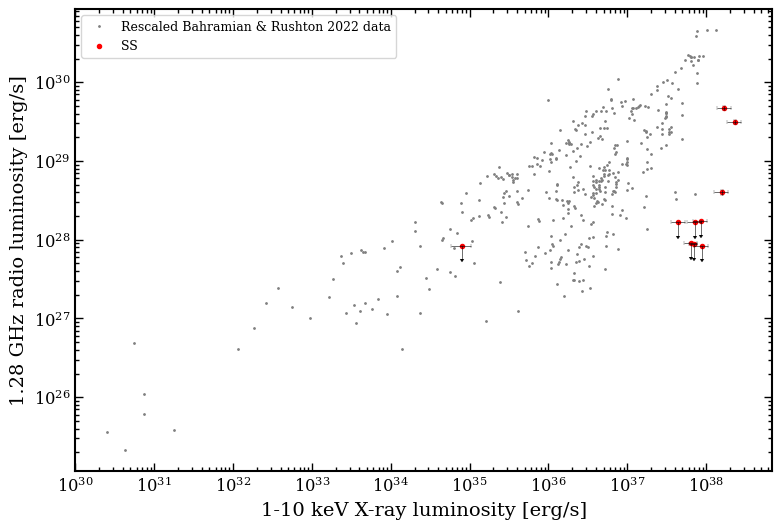

In [9]:
plot_Lr_Lx(paired_data, colourby="state", lx=lx_all, lr=lr_all)

# Interpolation

dt1, dt2:  3.0 10.0

Number of plotting points:  400
Rejected based on distance: radio_MJD = 59421.75919; time_to_nearest: 407.0771500000046; time_to_furthest: 59421.75919
59829.65461: time_to_nearest: 0.15256999999837717 & time_to_furthest: 0.7856200000023819; y_predict_err: 0.08641018397009681
59831.70687: time_to_nearest: 1.2666400000016438 & time_to_furthest: 1.63742999999522; y_predict_err: 0.08072516644815586
59838.71566: time_to_nearest: 0.9315199999982724 & time_to_furthest: 1.3312900000019; y_predict_err: 0.07567865058655521
59842.59219: time_to_nearest: 0.975109999999404 & time_to_furthest: 2.545239999999467; y_predict_err: 0.08404623604771011
59846.7369: time_to_nearest: 0.7275799999988521 & time_to_furthest: 3.1696000000010827; y_predict_err: 0.08739260413320782
59852.53187: time_to_nearest: 2.35120000000461 & time_to_furthest: 5.0673899999965215; y_predict_err: 0.08474065243963302
59859.69108: time_to_nearest: 1.5920200000036857 & time_to_furthest: 4.808009999993374; y_pre

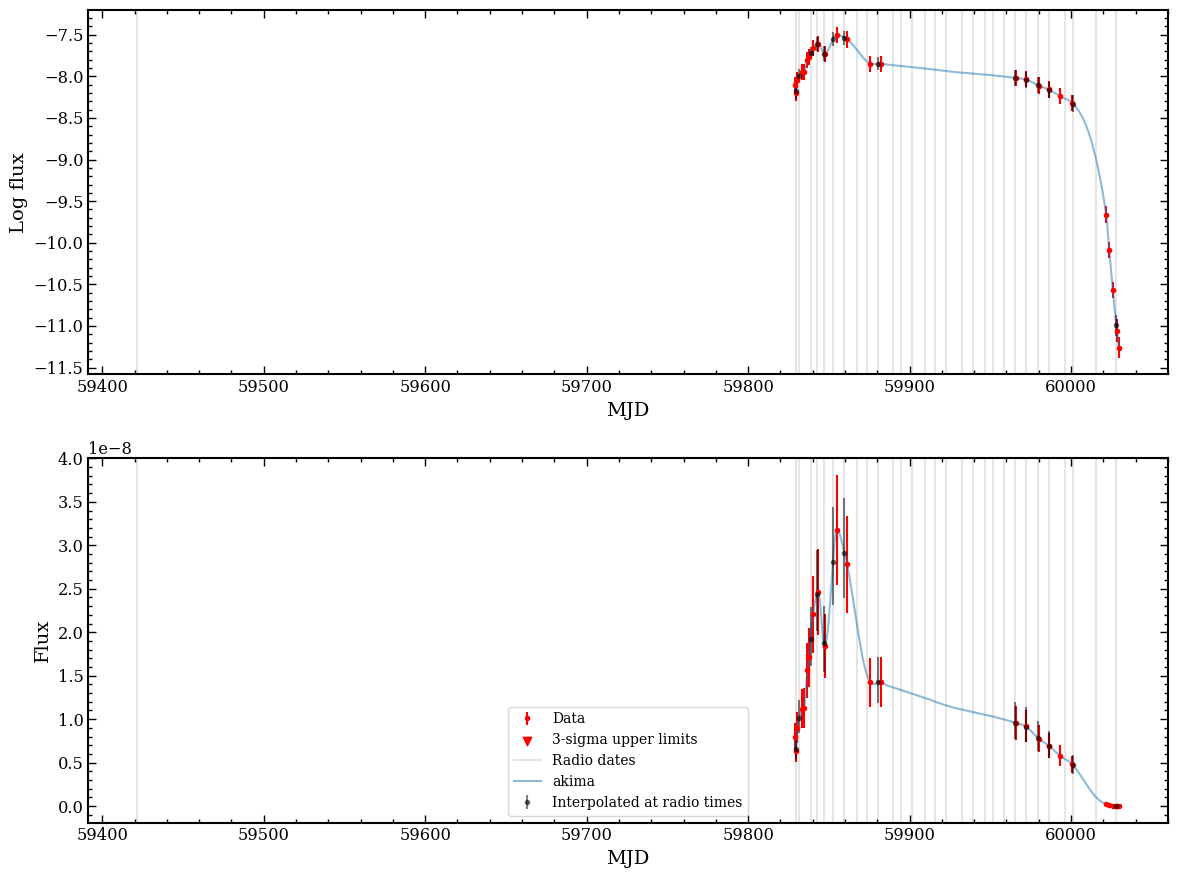

Number of used interpolated data points:  14
Converting to luminosity using d_kpc = 8.8


In [10]:
interpolated_data = make_interpolated_Lr_Lx_df(radio_df, xray_df, source_df, plotly=True)

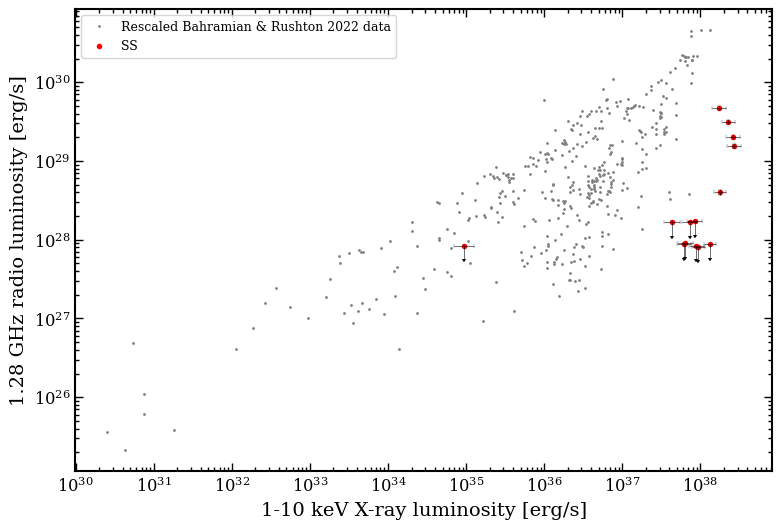

In [11]:
plot_Lr_Lx(interpolated_data, colourby="state", lx=lx_all, lr=lr_all)